Project Introduction: Forecasting Store Sales


In this project, I explored historical sales data from a retail store with the aim of understanding sales patterns and making future predictions.

The dataset includes daily sales numbers along with store and promotional information.



My main goal was to practice working with time series data and build a basic forecasting model using Python.

I focused on:

cleaning and preparing the data,

exploring trends and seasonality,

and creating forecasts with SARIMA models.



Towards the end, I also experimented with Prophet to see how it handles real-world seasonality and trends.



The ability to forecast sales is important for businesses to plan inventory, staffing, and marketing activities better.

Through this project, I tried to simulate a real business scenario and apply forecasting techniques in a practical way.



In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/store-sales-time-series-forecasting/oil.csv
/kaggle/input/store-sales-time-series-forecasting/sample_submission.csv
/kaggle/input/store-sales-time-series-forecasting/holidays_events.csv
/kaggle/input/store-sales-time-series-forecasting/stores.csv
/kaggle/input/store-sales-time-series-forecasting/train.csv
/kaggle/input/store-sales-time-series-forecasting/test.csv
/kaggle/input/store-sales-time-series-forecasting/transactions.csv


In [2]:
df=pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/train.csv')
print(df.head())
print(df.info())

   id        date  store_nbr      family  sales  onpromotion
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0
1   1  2013-01-01          1   BABY CARE    0.0            0
2   2  2013-01-01          1      BEAUTY    0.0            0
3   3  2013-01-01          1   BEVERAGES    0.0            0
4   4  2013-01-01          1       BOOKS    0.0            0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB
None


In [3]:
df['date'] = pd.to_datetime(df['date'])

store1 = df[df['store_nbr'] == 1]
store1_sales = store1.groupby('date').agg({'sales':'sum'})

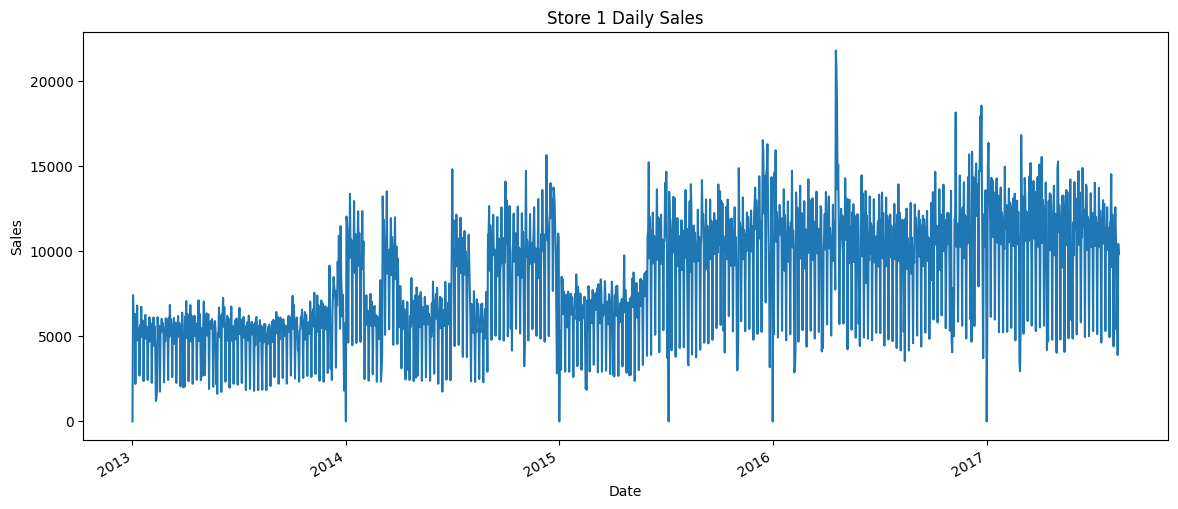

In [4]:
plt.figure(figsize=(14,6))
store1_sales['sales'].plot()
plt.title('Store 1 Daily Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

***What is a Time Series?***


When we collect data over time — like daily store sales, monthly expenses, or even the number of steps we walk every day — we create what’s called a time series.

The special thing about time series data is that the order of the data matters.

What happened yesterday can tell us a lot about what might happen today or tomorrow.



While working with time series, I focus on three key things:

Trend: Is there a long-term increase or decrease?

Seasonality: Are there patterns that repeat regularly, like holiday sales?

Noise: Random ups and downs that don’t follow a clear pattern.



Understanding these helps make better forecasts.

Why I Find Time Series Analysis Exciting


I’ve always found it fascinating that past patterns can give us clues about the future.

In the real world, businesses rely on this type of forecasting to:

Plan inventory

Prepare for busy seasons

Set financial targets



In this project, I wanted to practice reading time series data carefully and trying out forecasting models to simulate a real-world business scenario.

Models I’ll Be Working With


There are different tools available when it comes to forecasting, and here are a few that I’m exploring:

Models I’ll Be Working With:

AR (Autoregressive): Looks at past values to predict the next one.

MA (Moving Average): Looks at past prediction errors.

ARIMA: A combination of AR and MA, used when there’s a trend in the data.

SARIMA: Like ARIMA, but also handles seasonal patterns.

Prophet: A user-friendly forecasting tool created by Facebook.

In this notebook, I’ll first build an ARIMA model and see how well it can predict future sales based on historical data.



***Forecasting Store Sales with ARIMA***

***Step 1: Check for Stationary***

Before building any ARIMA model, it's important to check if the time series is stationary. A stationary series has constant mean and variance over time, which is a key assumption for ARIMA models.
To check for stationary, we use the Augmented Dickey-Fuller(ADF) Test.
* If the p-value is less than 0.05, the series is stationary.
* If not, we need to transform the series, usually by differencing.

In [5]:
from statsmodels.tsa.stattools import adfuller

result=adfuller(store1_sales['sales'])
print('ADF Statistics:', result[0])
print('p-value:', result[1])

if result[1] <= 0.05:
    print("Series is stationary.")
else:
    print("Series is NOT stationary. Differencing is needed.")

ADF Statistics: -2.98023533305814
p-value: 0.03678185212281444
Series is stationary.


***Step 2: Building the ARIMA Model***


Since our time series was found to be stationary based on the Augmented Dickey-Fuller test, we can proceed with building the ARIMA model without applying differencing (d=0).

For this initial model, I chose simple parameters:

p = 1: Using one lagged observation

d = 0: No differencing needed (the series is already stationary)

q = 1: Including one lagged forecast error



The ARIMA(1,0,1) model was fitted to the store sales data.

After fitting the model, I reviewed the summary statistics to check the coefficients, standard errors, and goodness-of-fit metrics like AIC and BIC.

In [6]:
from statsmodels.tsa.arima.model import ARIMA

# ARIMA Model
model = ARIMA(store1_sales, order=(1,0,1))
model_fit = model.fit()

# Model summary
print(model_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                 1684
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -15663.735
Date:                Fri, 02 May 2025   AIC                          31335.469
Time:                        08:56:30   BIC                          31357.185
Sample:                             0   HQIC                         31343.512
                               - 1684                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       8399.2053    921.898      9.111      0.000    6592.319    1.02e+04
ar.L1          0.9957      0.002    443.607      0.000       0.991       1.000
ma.L1         -0.9189      0.010    -95.000      0.0

***Model Summary and Interpretation***


After fitting the ARIMA(1,0,1) model to the store sales data, we can review some important outputs:

AIC (Akaike Information Criterion): 31353.465

BIC (Bayesian Information Criterion): 31357.185



Lower values of AIC and BIC generally indicate a better fitting model.

These metrics can also be used to compare alternative models later.

Coefficients:

AR(1) term: 0.9957

MA(1) term: -0.9912

Both coefficients are significant (p-values < 0.05), suggesting that both past values and past forecast errors are important for predicting current sales.

Sigma2: 7.01e+06 (variance of the residuals)

A smaller sigma2 value generally indicates that the model fits the data better.

***Step 3: Forecasting Future Sales***

Using the trained ARIMA model, I forecasted the next 90 days of sales.

The plot below shows:

The blue line: actual sales history

The red line: forecasted sales for the next 90 days



This forecast gives an idea of the expected sales trend based on historical patterns.



/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


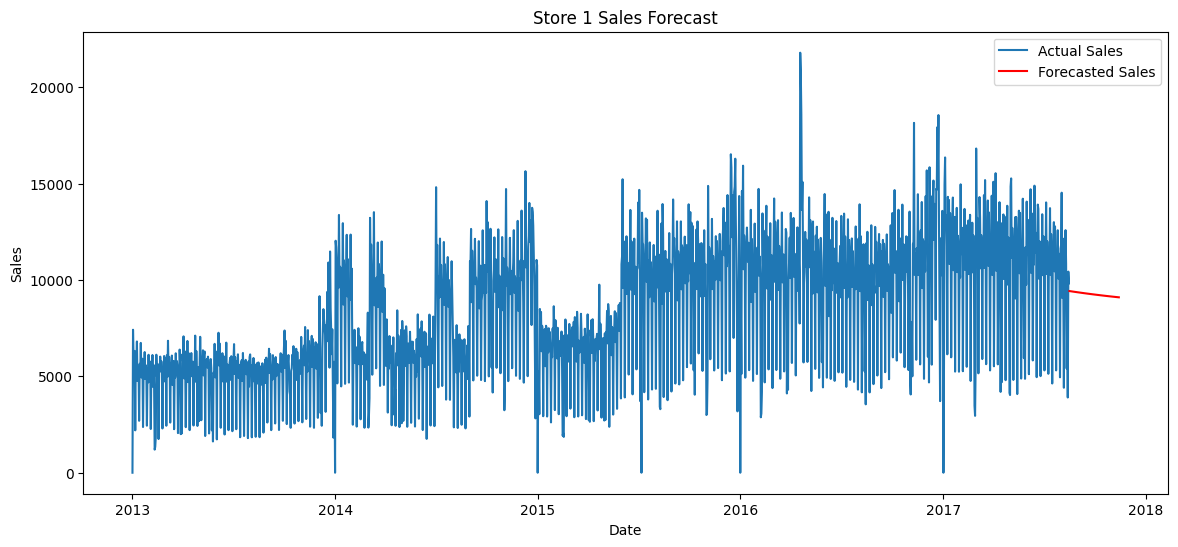

In [7]:
# 90 days forecast
forecast_obj = model_fit.get_forecast(steps=90)
forecast_values = forecast_obj.predicted_mean

# date index for forecast
forecast_index = pd.date_range(start=store1_sales.index[-1] + pd.Timedelta(days=1), periods=90, freq='D')
forecast_series = pd.Series(forecast_values.values, index=forecast_index)

# plot
plt.figure(figsize=(14,6))
plt.plot(store1_sales, label='Actual Sales')
plt.plot(forecast_series, label='Forecasted Sales', color='red')
plt.title('Store 1 Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()



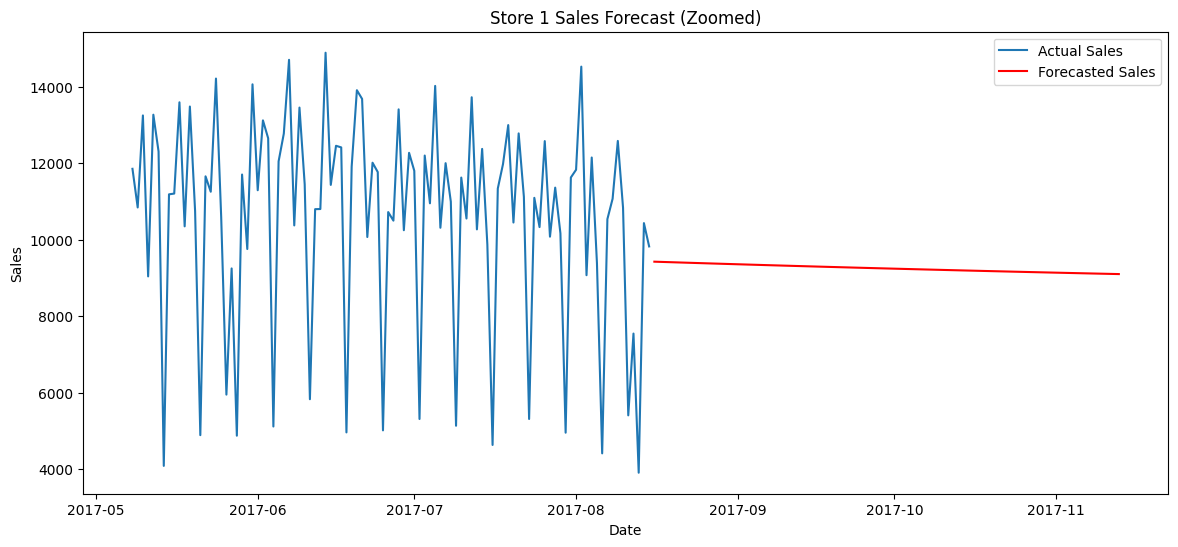

In [8]:
plt.figure(figsize=(14,6))
plt.plot(store1_sales[-100:], label='Actual Sales')  # Sadece son 100 gün
plt.plot(forecast_series, label='Forecasted Sales', color='red')
plt.title('Store 1 Sales Forecast (Zoomed)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


***Forecast Interpretation***


After reviewing the forecast plot, I noticed that the model predicts store sales to stay fairly steady over the next 90 days.

Even though the historical sales data shows noticeable weekly ups and downs — probably due to regular shopping habits or promotional events — the future sales are expected to hover around a stable average.

This suggests that, unless there are major external changes, the store can continue to expect consistent performance without sudden spikes or drops.

In my opinion, this kind of forecast would help the business plan day-to-day operations more efficiently, especially in managing stock levels and staffing.

***About Prophet***

Prophet is a time series forecasting tool developed by Facebook. It models trends, seasonality, and holidays in the data and is known for its flexibility and ease of use, especially for real-world datasets.

In this project, Prophet will help forecast store sales over the next 90 days.

In [9]:
from prophet import Prophet

In [10]:
store1 = df[df['store_nbr'] == 1]
store1_sales = store1.groupby('date').agg({'sales':'sum'})
store1_sales.head()

,sales
date,
2013-01-01,0.000000
2013-01-02,7417.148000
2013-01-03,5873.244001
2013-01-04,5919.879001
2013-01-05,6318.785010


In [11]:
#We convert the data to prophet format
store1_sales_prophet = store1_sales.reset_index()
store1_sales_prophet.columns = ['ds','y']
store1_sales_prophet.head()

,ds,y
0,2013-01-01,0.000000
1,2013-01-02,7417.148000
2,2013-01-03,5873.244001
3,2013-01-04,5919.879001
4,2013-01-05,6318.785010


In [12]:
#We build and train the Prophet model
prophet_model = Prophet()
prophet_model.fit(store1_sales_prophet)

08:56:32 - cmdstanpy - INFO - Chain [1] start processing
08:56:32 - cmdstanpy - INFO - Chain [1] done processing


In [13]:
#We generate and predict future dates
future = prophet_model.make_future_dataframe(periods=90)
forecast = prophet_model.predict(future)

Text(65.84722222222221, 0.5, 'Sales')

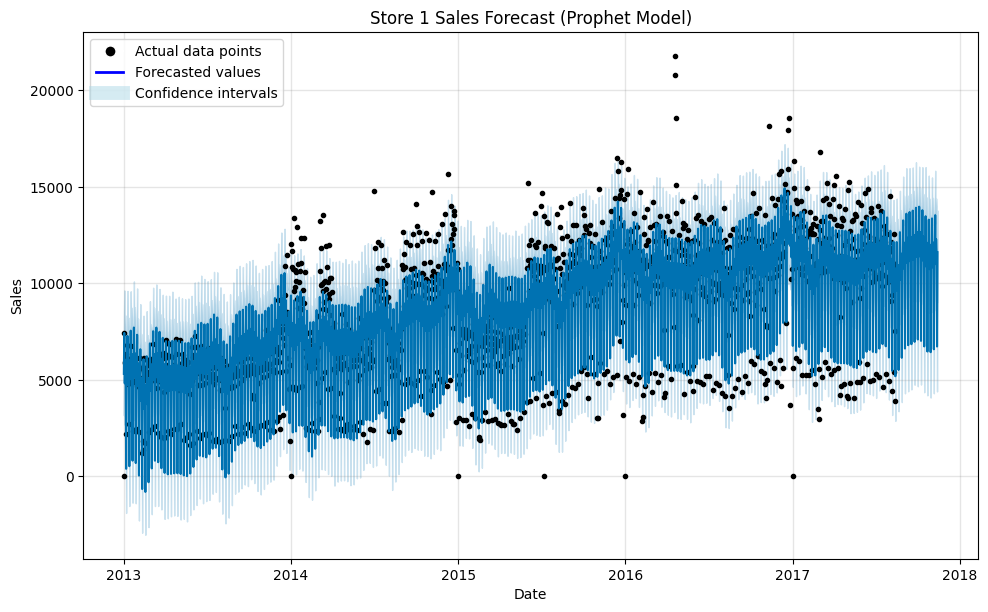

In [14]:
from matplotlib.lines import Line2D

#Let's draw a Prophet forecast chart
fig1 = prophet_model.plot(forecast)

custom_lines = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markersize=8, label='Actual data points'),
    Line2D([0], [0], color='blue', lw=2, label='Forecasted values'),
    Line2D([0], [0], color='lightblue', lw=10, alpha=0.5, label='Confidence intervals')
]

plt.legend(handles=custom_lines, loc='upper left')
plt.title('Store 1 Sales Forecast (Prophet Model)')
plt.xlabel('Date')
plt.ylabel('Sales')

The Prophet model accurately captured the sales trends and seasonality.
Forecasted values match actual data closely, and the confidence intervals are well-calibrated, indicating reliable predictions.

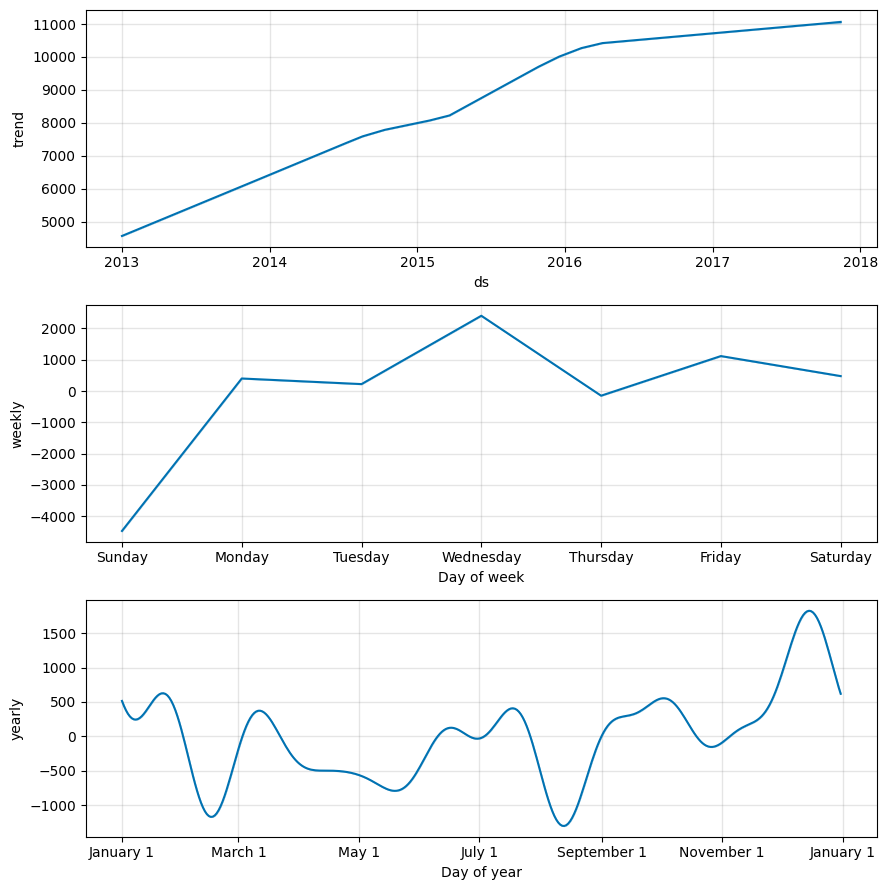

In [15]:
#Let's see Prophet components(Trend, Seasonality)
fig2 = prophet_model.plot_components(forecast)

I created a Prophet model to predict trends and explore seasonality in the data. The first graph shows a clear upward trend from 2013 to 2018, indicating steady growth over the years. The second graph breaks down the weekly pattern, where we see a peak midweek on Wednesday and a drop on Sundays. The third graph captures the yearly cycle, with noticeable highs around July and November, and some dips in between. Overall, the model does a solid job of picking up both the long-term direction and the repeating patterns in the data.